# Part 3: Multivariate Linear Regression

In [10]:
graphics_toolkit ("gnuplot");

In [2]:
x = load("datasets/ex3x.dat");
y = load("datasets/ex3y.dat");

In [3]:
% adding intercept
m = length(x);
x = [ones(m, 1), x];
unscaled_x = x;

In [4]:
% standardising values
sigma = std(x);
mu = mean(x);
x(:,2) = (x(:,2) - mu(2))./ sigma(2);
x(:,3) = (x(:,3) - mu(3))./ sigma(3);

In [5]:
function J = computeCost(X, y, theta)
    m = length(y); % number of training examples

    cost = 0;
    for i = 1:m
        cost = cost + (theta' * X(i,:)'- y(i))^2;
    end;
    
    J = cost / (2 * m);

end

In [6]:
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)

    % Initialize some useful values
    m = length(y); % number of training examples
    J_history = zeros(num_iters, 1);

    for iter = 1:num_iters

        h = X * theta;
        errors = h - y;
        delta = X' * errors;
        theta = theta - (alpha / m) * delta;
        
        J_history = computeCost(X, y, theta);
    end

end

### (i) Calculate J(θ), loss,  using the θ of the current stage of gradient descent.

In [7]:
function [theta, J_history] = calculateHistory(x, y, learning_rate, number_of_iterations)
    theta = zeros (size(x(1,:)))';

    J_history = zeros (50, 1);

    for current_iteration = 1:number_of_iterations
        [theta, J_history(current_iteration)] = gradientDescent(x, y, theta, learning_rate, current_iteration); 
    end

end

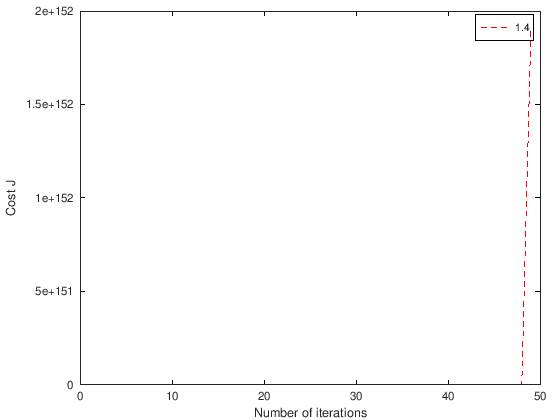

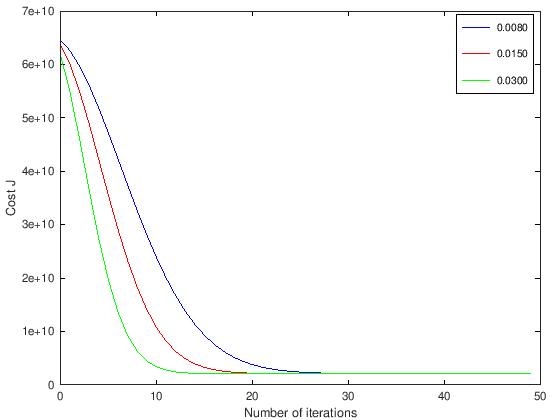

In [11]:
% 1
learning_rate_1 = 0.0080;
number_of_iterations_1 = 50;

% 2
learning_rate_2 = 0.0150;
number_of_iterations_2 = 50;

% 3
learning_rate_3 = 0.0300;
number_of_iterations_3 = 50;

% 4
learning_rate_4 = 1.4;
number_of_iterations_4 = 50;

[calculated_theta_1, calculated_J_history_1] = calculateHistory(x, y, learning_rate_1, number_of_iterations_1);
[calculated_theta_2, calculated_J_history_2] = calculateHistory(x, y, learning_rate_2, number_of_iterations_2);
[calculated_theta_3, calculated_J_history_3] = calculateHistory(x, y, learning_rate_3, number_of_iterations_3);
[calculated_theta_4, calculated_J_history_4] = calculateHistory(x, y, learning_rate_4, number_of_iterations_4);


figure;
% J1
plot(0:49, calculated_J_history_1(1:50), 'b-');

% J2
hold on;
plot(0:49, calculated_J_history_2(1:50), 'r-');

% J3
hold on;
plot(0:49, calculated_J_history_3(1:50), 'g-');


legend('0.0080', '0.0150', '0.0300');
xlabel("Number of iterations");
ylabel("Cost J");

% J4
figure;
plot(0:49, calculated_J_history_4(1:50), 'r--');
legend('1.4');
xlabel("Number of iterations");
ylabel("Cost J");

## Question 1: What happens when the learning rate is too small? Too large?

##### Answer: 
As observed on the second plotted graph above, when the learning rate is small, the cost function takes more iterations to converge, while a large learning rate takes a lesser number of iterations before converging. However if the learning rate is too large, $J(\theta)$ might blow up like in the first graph above when learning rate was set to `1.4` .

## Question 2:
#### Using the best learning rate that we found, run gradient descent until convergence to find:
- The final values of θ
- The predicted price of a house with 1650 square feet and 3 bedrooms. We must not forget to scale the features when we make this prediction!


In [12]:
% Final Values of θ:
fprintf('%.0f\n', calculated_theta_3)

340413
110631
-6649


In [17]:
price_grad_desc = dot(calculated_theta_3, [1, (1650 - mu(2))/sigma(2), (3 - mu(3))/sigma(3)]);
theta_normal = (unscaled_x' * unscaled_x)\unscaled_x' * y;

%Estimate the house price again
price_normal = dot(theta_normal, [1, 1650, 3]);
fprintf("Price of 1650 square feet and 3 bedroom house is $%0.f.", price_normal);

Price of 1650 square feet and 3 bedroom house is $293081.